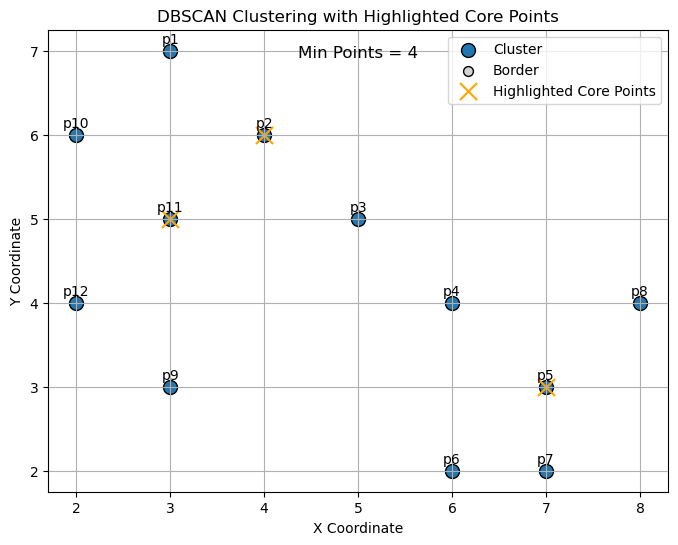

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Define your own 12 points with (x, y) coordinates
data = np.array([
    [3, 7],  # p1
    [4, 6],  # p2
    [5, 5],  # p3
    [6, 4],  # p4
    [7, 3],  # p5
    [6, 2],  # p6
    [7, 2],  # p7
    [8, 4],  # p8
    [3, 3],  # p9
    [2, 6],  # p10
    [3, 5],  # p11
    [2, 4]   # p12
])

# DBSCAN parameters
epsilon = 3  # Maximum distance for neighbors
min_samples = 4  # Minimum samples to form a core point

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(data)

# Identify core samples
core_samples = dbscan.core_sample_indices_

# Unique cluster labels (excluding noise)
unique_labels = set(clusters) - {-1}

# Visualize the results
plt.figure(figsize=(8, 6))

# Plot each cluster
for label in unique_labels:
    # Core points
    plt.scatter(data[clusters == label][:, 0], data[clusters == label][:, 1],
                label='Cluster', marker='o', edgecolor='k', s=100)
    
    # Border points (those not in core but in clusters)
    border_points = data[(clusters == label) & (np.isin(np.arange(data.shape[0]), core_samples, invert=True))]
    plt.scatter(border_points[:, 0], border_points[:, 1],
                c='lightgrey', edgecolor='k', label='Border', s=50)

# Highlight specific core points p2, p5, p11
highlight_points = [1, 4, 10]  # Indices for p2, p5, p11
plt.scatter(data[highlight_points][:, 0], data[highlight_points][:, 1],
            c='orange', marker='x', s=150, label='Highlighted Core Points')

# Add labels for each point
labels = [f'p{i+1}' for i in range(len(data))]
for i, txt in enumerate(labels):
    plt.annotate(txt, (data[i, 0], data[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

# Add a label for min_points
plt.text(0.5, 0.95, f'Min Points = {min_samples}', horizontalalignment='center',
         verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

# Add titles and labels
plt.title('DBSCAN Clustering with Highlighted Core Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
